In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import get_dataremodelled as gdr
import graphcreating as gc
from collections import Counter
import numpy as np


In [18]:
df_en=pd.read_csv('Data/revisions_en.csv')
df_de=pd.read_csv('Data/revisions_de.csv')
df_es=pd.read_csv('Data/revisions_es.csv')
df_fr=pd.read_csv('Data/revisions_fr.csv')
gender=pd.read_csv('gendered_titles_final.csv')
gender=gender.drop_duplicates(subset='Name')


In [ ]:
df_en=gdr.prep_data(df_en,gender)
df_de=gdr.prep_data(df_de,gender)
df_es=gdr.prep_data(df_es,gender)
df_fr=gdr.prep_data(df_fr,gender)


In [20]:
years = df_en['Year'].unique().tolist()
years.sort()


In [ ]:
df_en=gdr.prep_links(df_en,gender)
df_de=gdr.prep_links(df_de,gender)
df_es=gdr.prep_links(df_es,gender)
df_fr=gdr.prep_links(df_fr,gender)

In [6]:
def prep_lists(df):
    yearlist=[]
    nodeslist=[]
    edgeslist=[]
    top10list=[]
    for year in years:
        df_year=df[df['Year']==year]
        G=gc.create_directed_graph(df_year,gender)
        degreeView = G.in_degree()
        degree_counts = Counter(dict(degreeView))
        max_degree_node = degree_counts.most_common(10)
        yearlist.append(year)
        nodeslist.append(G.number_of_nodes())
        edgeslist.append(G.number_of_edges())
        top10list.append(max_degree_node)
    return yearlist,nodeslist,edgeslist,top10list

yearlist_en,nodeslist_en,edgeslist_en,top10list_en=prep_lists(df_en)
yearlist_de,nodeslist_de,edgeslist_de,top10list_de=prep_lists(df_de)
yearlist_es,nodeslist_es,edgeslist_es,top10list_es=prep_lists(df_es)
yearlist_fr,nodeslist_fr,edgeslist_fr,top10list_fr=prep_lists(df_fr)

df_graph_en=pd.DataFrame(list(zip(yearlist_en,nodeslist_en,edgeslist_en,top10list_en)),columns=['Year','Nodes','Edges','Top10'])
df_graph_de=pd.DataFrame(list(zip(yearlist_de,nodeslist_de,edgeslist_de,top10list_de)),columns=['Year','Nodes','Edges','Top10'])
df_graph_es=pd.DataFrame(list(zip(yearlist_es,nodeslist_es,edgeslist_es,top10list_es)),columns=['Year','Nodes','Edges','Top10'])
df_graph_fr=pd.DataFrame(list(zip(yearlist_fr,nodeslist_fr,edgeslist_fr,top10list_fr)),columns=['Year','Nodes','Edges','Top10'])

df_graph_en.to_csv('yearstats_en.csv',index=False)
df_graph_de.to_csv('yearstats_de.csv',index=False)
df_graph_es.to_csv('yearstats_es.csv',index=False)
df_graph_fr.to_csv('yearstats_fr.csv',index=False)

In [23]:
df_graph_en=pd.read_csv('yearstats_en.csv')
df_graph_de=pd.read_csv('yearstats_de.csv')
df_graph_es=pd.read_csv('yearstats_es.csv')
df_graph_fr=pd.read_csv('yearstats_fr.csv')


In [24]:
edgeslist_en=df_graph_en['Edges'].tolist()
nodeslist_en=df_graph_en['Nodes'].tolist()
yearlist=df_graph_en['Year'].tolist()
edgeslist_de=df_graph_de['Edges'].tolist()
nodeslist_de=df_graph_de['Nodes'].tolist()
edgeslist_es=df_graph_es['Edges'].tolist()
nodeslist_es=df_graph_es['Nodes'].tolist()
edgeslist_fr=df_graph_fr['Edges'].tolist()
nodeslist_fr=df_graph_fr['Nodes'].tolist()

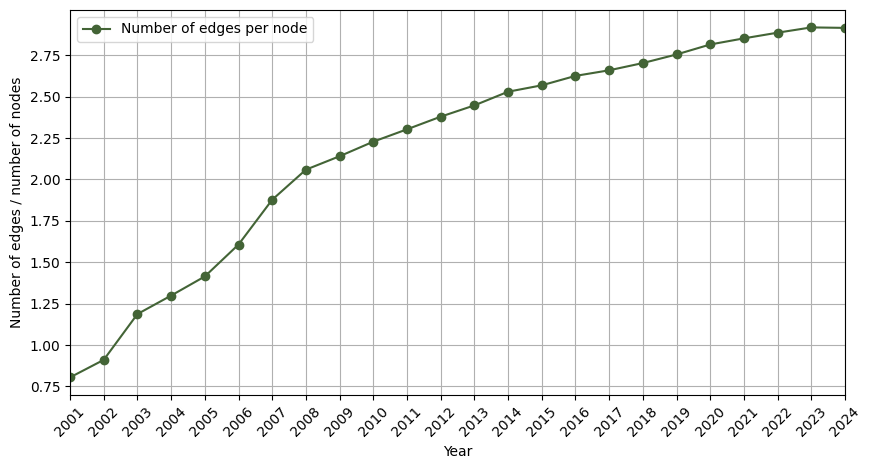

In [35]:
connectivitylist=[]
for i in range(len(yearlist)):
    connectivitylist.append((edgeslist_en[i]/nodeslist_en[i]))

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(yearlist, connectivitylist, label="Number of edges per node", color='#436436', zorder=2, linestyle='-', marker='o')
ax.set_xticks(yearlist)
ax.set_xlim(2001, 2024)
ax.set_yticks(np.arange(0.75, 3, 0.25))
ax.set_xticklabels(yearlist, rotation=45)
ax.set_xlabel('Year')
ax.set_ylabel('Number of edges / number of nodes')
ax.legend()
ax.grid()
plt.show()


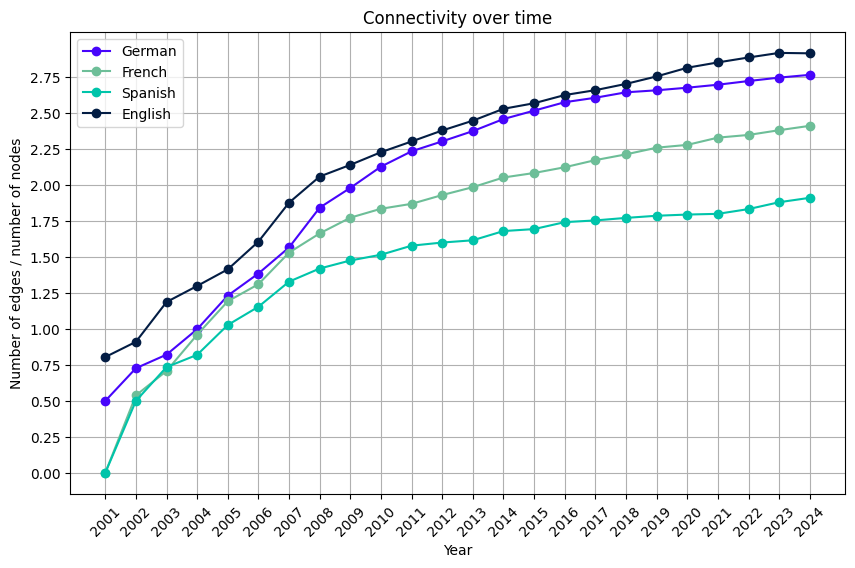

In [10]:
connectivitylist_en=[]
connectivitylist_de=[]
connectivitylist_es=[]
connectivitylist_fr=[]
for i in range(len(yearlist)):
    if nodeslist_en[i]==0:
        connectivitylist_en.append(0)
    else:
        connectivitylist_en.append((edgeslist_en[i]/nodeslist_en[i]))
    if nodeslist_de[i]==0:
        connectivitylist_de.append(0)
    else:
        connectivitylist_de.append((edgeslist_de[i]/nodeslist_de[i]))
    if nodeslist_es[i]==0:
        connectivitylist_es.append(0)
    else:
        connectivitylist_es.append((edgeslist_es[i]/nodeslist_es[i]))
    if nodeslist_fr[i]==0:
        connectivitylist_fr.append(0)
    else:
        connectivitylist_fr.append((edgeslist_fr[i]/nodeslist_fr[i]))

cEN='#031D44'
cDE='#4705FB'
cES='#00C4AA'
cFR='#6DBE98'
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(yearlist, connectivitylist_de, label="German", color=cDE, zorder=2, linestyle='-', marker='o')
ax.plot(yearlist, connectivitylist_fr, label="French", color=cFR, zorder=2, linestyle='-', marker='o')
ax.plot(yearlist, connectivitylist_es, label="Spanish", color=cES, zorder=2, linestyle='-', marker='o')
ax.plot(yearlist, connectivitylist_en, label="English", color=cEN, zorder=2, linestyle='-', marker='o')
ax.set_xticks(yearlist)
ax.set_yticks(np.arange(0, 3, 0.25))
ax.set_xticklabels(yearlist, rotation=45)
ax.set_xlabel('Year')
ax.set_ylabel('Number of edges / number of nodes')
ax.set_title('Connectivity over time')
ax.legend()
ax.grid()
plt.show()


In [11]:
list_nodes_en = []
list_edges_en = []
list_nodes_de = []
list_edges_de = []
list_nodes_es = []
list_edges_es = []
list_nodes_fr = []
list_edges_fr = []

for i in range(1, len(yearlist)):
    list_nodes_en.append(nodeslist_en[i] - nodeslist_en[i - 1])
    list_edges_en.append(edgeslist_en[i] - edgeslist_en[i - 1])
    list_nodes_de.append(nodeslist_de[i] - nodeslist_de[i - 1])
    list_edges_de.append(edgeslist_de[i] - edgeslist_de[i - 1])
    list_nodes_es.append(nodeslist_es[i] - nodeslist_es[i - 1])
    list_edges_es.append(edgeslist_es[i] - edgeslist_es[i - 1])
    list_nodes_fr.append(nodeslist_fr[i] - nodeslist_fr[i - 1])
    list_edges_fr.append(edgeslist_fr[i] - edgeslist_fr[i - 1])


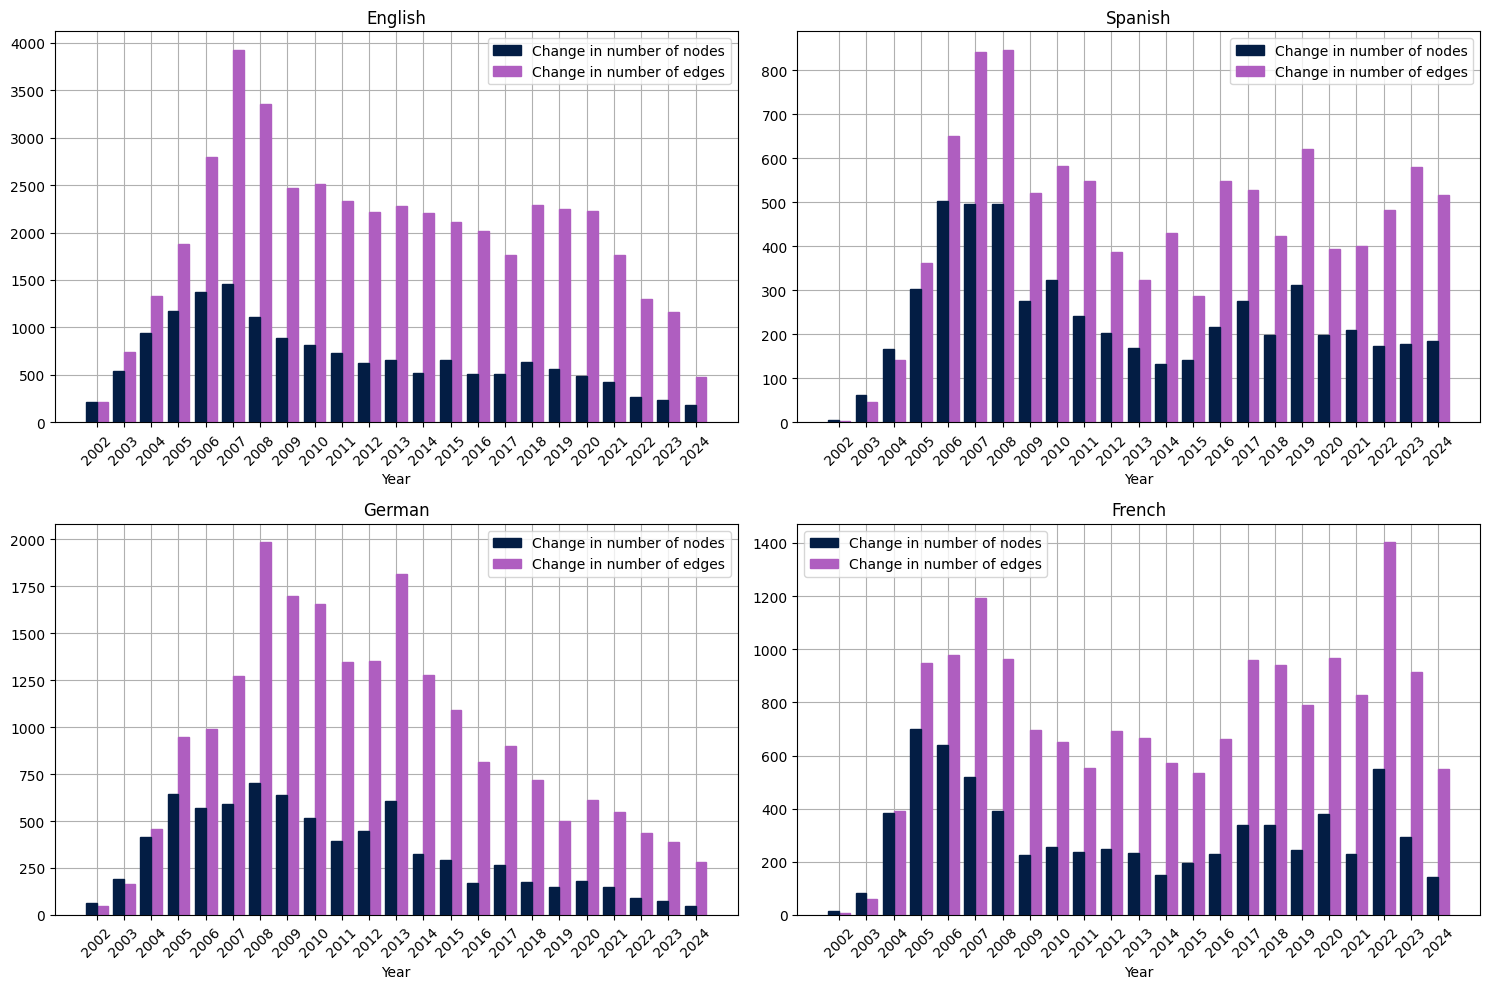

In [14]:
bar_width = 0.4

fig, axs = plt.subplots(2, 2, figsize=(15, 10))  

r1 = np.arange(len(yearlist[1:]))
r2 = [x + bar_width for x in r1]

c1='#031D44'
c2='#AF5EC0'

axs[0,0].bar(r1, list_nodes_en, color=c1, width=bar_width, edgecolor=c1, label='Change in number of nodes', zorder=3)
axs[0,0].bar(r2, list_edges_en, color=c2, width=bar_width, edgecolor=c2, label='Change in number of edges', zorder=2)
axs[0,0].set_xticks([r + bar_width / 2 for r in range(len(yearlist[1:]))])
axs[0,0].set_xticklabels(yearlist[1:], rotation=45)
axs[0,0].set_xlabel('Year')
axs[0,0].set_title('English')
axs[0,0].legend()
axs[0,0].grid()

axs[1,0].bar(r1, list_nodes_de, color=c1, width=bar_width, edgecolor=c1, label='Change in number of nodes', zorder=3)
axs[1,0].bar(r2, list_edges_de, color=c2, width=bar_width, edgecolor=c2, label='Change in number of edges', zorder=2)
axs[1,0].set_xticks([r + bar_width / 2 for r in range(len(yearlist[1:]))])
axs[1,0].set_xticklabels(yearlist[1:], rotation=45)
axs[1,0].set_xlabel('Year')
axs[1,0].set_title('German')
axs[1,0].legend()
axs[1,0].grid()

axs[0,1].bar(r1, list_nodes_es, color=c1, width=bar_width, edgecolor=c1, label='Change in number of nodes', zorder=3)
axs[0,1].bar(r2, list_edges_es, color=c2, width=bar_width, edgecolor=c2, label='Change in number of edges', zorder=2)
axs[0,1].set_xticks([r + bar_width / 2 for r in range(len(yearlist[1:]))])
axs[0,1].set_xticklabels(yearlist[1:], rotation=45)
axs[0,1].set_xlabel('Year')
axs[0,1].set_title('Spanish')
axs[0,1].legend()
axs[0,1].grid()

axs[1,1].bar(r1, list_nodes_fr, color=c1, width=bar_width, edgecolor=c1, label='Change in number of nodes', zorder=3)
axs[1,1].bar(r2, list_edges_fr, color=c2, width=bar_width, edgecolor=c2, label='Change in number of edges', zorder=2)
axs[1,1].set_xticks([r + bar_width / 2 for r in range(len(yearlist[1:]))])
axs[1,1].set_xticklabels(yearlist[1:], rotation=45)
axs[1,1].set_xlabel('Year')
axs[1,1].set_title('French')
axs[1,1].legend()
axs[1,1].grid()

plt.tight_layout()
plt.show()

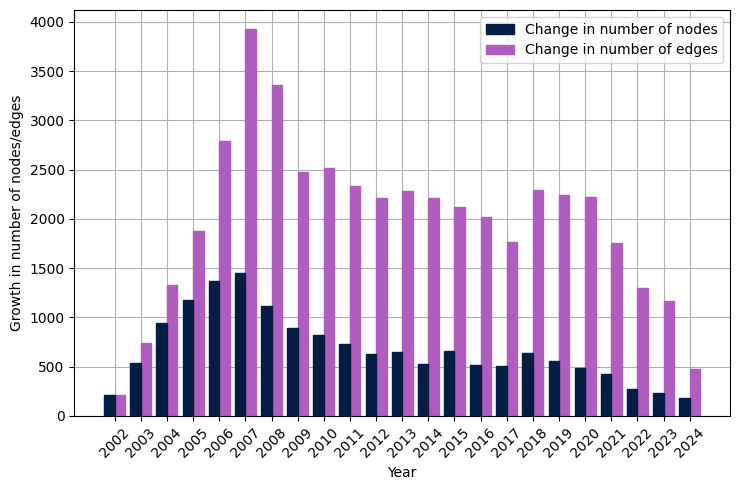

In [13]:
bar_width = 0.4

fig, ax = plt.subplots(figsize=(7.5, 5)) 

r1 = np.arange(len(yearlist[1:]))
r2 = [x + bar_width for x in r1]

ax.bar(r1, list_nodes_en, color=c1, width=bar_width, edgecolor=c1, label='Change in number of nodes', zorder=3)
ax.bar(r2, list_edges_en, color=c2, width=bar_width, edgecolor=c2, label='Change in number of edges', zorder=2)

ax.set_xticks([r + bar_width / 2 for r in range(len(yearlist[1:]))])
ax.set_xticklabels(yearlist[1:], rotation=45)

ax.set_xlabel('Year')
ax.set_ylabel('Growth in number of nodes/edges')
ax.legend()

ax.grid()

plt.tight_layout()
plt.show()